<a href="https://colab.research.google.com/github/IyadKhuder/The-Metropolitan-Museum-of-Art/blob/main/NYMM_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Metropolitan Museum of Art 

In this repo, I'm trying to explore the data, and apply some machine learning on it.

Having explored the data, I've come up with the following reasoning:

Discussion of the dataset and the plan of attack Challenges:

The dataset is full of NaN cells The dataset is full of NaN cells Very unbalanced Text data: There is no "sentiment" features in the dataset, such as: Good or bad, expensive or cheap, valuable or not, ...etc. Plus, a majority of the items lack for descriptive text, which could be used to infer such information. Thus, it is very unclear how to perform any NLP Sentimental Analysis or Recommender Model on this dataset, if any.

P.S. Check the Read-me file for details.

Engr. Iyad Khuder - December 20, 2022

## I. Imports & Definitions 

### Importing the libraries

In [ ]:
# Defining some variables
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from PIL import Image

### Chart utils

Here are two functions for making pie charts and bar charts

In [ ]:
def plot_pie_chart(values, labels, title):
  fig1, ax1 = plt.subplots()
  ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
  plt.title(title, size=10, pad=25)

  plt.show()

In [ ]:
def plot_bar_chart(df, column, figsize=(10,5), title=None):
    counts = df[column].value_counts()[:10]
    plt.figure(figsize=figsize)
    sns.barplot(counts.values, counts.index)
    plt.xlabel('Number of artworks', size=14, labelpad=15)
    plt.xticks(rotation=0)
    plt.ylabel(column, size=14)
    plt.title(title, size=14, pad=15)
    plt.show()

### Importing the dataset

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

###  *Connecting to Google-Drive and importing the dataset file*

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# The link to the gross "raw" CSV dataset file on my Google Drive:
#https://drive.google.com/file/d/1PcYqwMy3NNcwUQOfECv8_HXVbKAwtg3N/view?usp=share_link

# out of which, we take the file ID:
download = drive.CreateFile({'id': '1PcYqwMy3NNcwUQOfECv8_HXVbKAwtg3N'})

# Download the file to a local disc
download.GetContentFile('df_Gross.csv')


In [ ]:
df = pd.read_csv('df_Gross.csv')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## II. Surveillance over the dataset

In [ ]:
df.shape

(477804, 54)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477804 entries, 0 to 477803
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            477804 non-null  object 
 1   Is Highlight             477804 non-null  bool   
 2   Is Timeline Work         477804 non-null  bool   
 3   Is Public Domain         477804 non-null  bool   
 4   Object ID                477804 non-null  int64  
 5   Gallery Number           51776 non-null   object 
 6   Department               477804 non-null  object 
 7   AccessionYear            474248 non-null  object 
 8   Object Name              476113 non-null  object 
 9   Title                    448619 non-null  object 
 10  Culture                  207379 non-null  object 
 11  Period                   90956 non-null   object 
 12  Dynasty                  23233 non-null   object 
 13  Reign                    11226 non-null   object 
 14  Port

In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [ ]:
# A set of colums with more than 50% missing values
missing_cols = set(df.columns[df.isnull().mean() > 0.50])
print(len(missing_cols))
print(missing_cols)

26
{'Country', 'Object_Wikidata_URL', 'Portfolio', 'County', 'Dynasty', 'Reign', 'Gallery_Number', 'State', 'Artist_Wikidata_URL', 'Subregion', 'Tags', 'Artist_Gender', 'City', 'Locale', 'Artist_ULAN_URL', 'Excavation', 'Period', 'Rights_and_Reproduction', 'River', 'Locus', 'Metadata_Date', 'Geography_Type', 'Tags_AAT_URL', 'Region', 'Culture', 'Tags_Wikidata_URL'}


We see that the raw data has 26 fields (columns/features) out of 54 ones, that have at least 50% of their values null (NaN/none), which is a large proportion.

In [ ]:
# See the list of columns with mostly (>50%) missing values
for col in missing_cols:
  print(col)

Country
Object_Wikidata_URL
Portfolio
County
Dynasty
Reign
Gallery_Number
State
Artist_Wikidata_URL
Subregion
Tags
Artist_Gender
City
Locale
Artist_ULAN_URL
Excavation
Period
Rights_and_Reproduction
River
Locus
Metadata_Date
Geography_Type
Tags_AAT_URL
Region
Culture
Tags_Wikidata_URL


In [ ]:
# Number of missing values for each column, sorted in descending order
df.isnull().sum().sort_values(ascending=False)

Metadata_Date              477804
River                      475709
State                      475254
Locus                      470311
County                     469354
Reign                      466578
Locale                     462095
Excavation                 461246
Subregion                  455680
Object_Wikidata_URL        455539
Dynasty                    454571
Portfolio                  454274
Rights_and_Reproduction    453606
Region                     446444
City                       445397
Gallery_Number             426028
Geography_Type             418035
Country                    402053
Period                     386848
Artist_Gender              374743
Tags                       277404
Tags_AAT_URL               277404
Tags_Wikidata_URL          277404
Culture                    270425
Artist_Wikidata_URL        260072
Artist_ULAN_URL            255783
Artist_Role                204368
Artist_Display_Bio         204368
Artist_Suffix              202317
Artist_End_Dat

The most convenient feature to work with in terms of ML is potentially: Classification.
Therefore, let's rename it as "label", to comply with the ML terminology:

In [ ]:
df.rename(columns = {'Classification':'label'}, inplace = True)

In [ ]:
Labels_Counts = df['label'].value_counts()

In [ ]:
num_labels = len(Labels_Counts)

In [ ]:
num_labels

1212

See that there are 1212 distinct labels!

In [ ]:
# (classes):
df['label'].value_counts()[:20]

Prints                                  80981
Prints|Ephemera                         28388
Photographs                             27091
Drawings                                22717
Vases                                   21315
Books                                   14764
Ceramics                                11059
Textiles-Woven                          11000
Photographs|Ephemera                    10018
Paintings                                8624
Glass                                    6133
Negatives                                6133
Prints|Ornament & Architecture           5171
Drawings|Ornament & Architecture         4974
Textiles-Laces                           4957
Ceramics-Porcelain                       4373
Textiles-Embroidered                     4086
Metalwork-Silver                         3976
Books|Prints|Ornament & Architecture     3752
Ceramics-Pottery                         3664
Name: label, dtype: int64

In [ ]:
# (classes):
df['label'].value_counts()[600:]

Armor Parts-Gorgets              8
Armor Parts-Colletins, Parts     8
Firearms-Hand Cannon             8
Sculpture-Plaster                8
Accessory-Neckwear               8
                                ..
Ornament & Architecture|Books    1
Albums|Books                     1
Albums|Drawings|Sketchbooks      1
Paper-Graphics-Inscribed         1
Ephemera|Postcards               1
Name: label, Length: 612, dtype: int64

Notice how unbalanced the dataset's classes (labels) are!
While the top 20 classes count at least 3664, more than half of the classes count no more than 8 items!

A little bit more surveillance (playing around) to explore anything interesting:

In [ ]:
df.sample(n=5)

,Object_Number,Is_Highlight,Is_Timeline_Work,Is_Public_Domain,Object_ID,Gallery_Number,Department,AccessionYear,Object_Name,Title,...,River,label,Rights_and_Reproduction,Link_Resource,Object_Wikidata_URL,Metadata_Date,Repository,Tags,Tags_AAT_URL,Tags_Wikidata_URL
445660,2011.604.10.182,False,False,True,766165,NaN,Greek and Roman Art,2011.0,Undetermined closed shape,Terracotta fragment of a closed shape,...,NaN,Vases,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
89565,2009.300.1972,False,False,True,156746,NaN,Costume Institute,2009.0,Bonnet,Bonnet,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Flowers,http://vocab.getty.edu/page/aat/300132399,https://www.wikidata.org/wiki/Q506
410282,2011.604.1.5939,False,False,True,704030,NaN,Greek and Roman Art,2011.0,Mastoid fragments,Terracotta fragment of a mastoid?,...,NaN,Vases,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
282749,17.50.17-371(436),False,False,True,419578,NaN,Drawings and Prints,1917.0,Print,"S. Sabas, abbe (St. Sabas, Abbot), December 5t...",...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Men|Saints,http://vocab.getty.edu/page/aat/300025928|http...,https://www.wikidata.org/wiki/Q8441|https://ww...
139694,74.51.754,False,False,True,240341,171.0,Greek and Roman Art,1874.0,Bottle,Terracotta lentoid flask,...,NaN,Vases,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [ ]:
df.loc[df['Object_ID'].isin( [126,130,134] ),['Object_ID','Link_Resource','Department','Title'] ]

,Object_ID,Link_Resource,Department,Title
117,126,http://www.metmuseum.org/art/collection/search...,The American Wing,Figure of an Apple
121,130,http://www.metmuseum.org/art/collection/search...,The American Wing,Frame
125,134,http://www.metmuseum.org/art/collection/search...,The American Wing,Architectural elements from a Retiring Room in...


In [ ]:
imgx = df[ df['Object_ID']==19003]

In [ ]:
len(imgx)

1

Based on the above surveillance, I've come up with the following reasoning:

## Discussion of the dataset and the plan of attack

**Challenges:**
*   The dataset is full of NaN cells
*   The dataset is full of NaN cells
*   Very unbalanced

Text data:
There is no "sentiment" features in the dataset, such as: Good or bad, expensive or cheap, valuable or not, ...etc. Plus, a majority of the items lack for descriptive text, which could be used to infer such information.
Thus, it is very unclear how to perform any NLP Sentimental Analysis or Recommender Model on this dataset, if any.

**Therefore**

I will work on image classification.
Here, there are further obstacles, in addition to the 2 ones mentioned above: 
*   The main challenge is to withdraw the images from the website, for the following reason:
The dataset does not provide a direct link to the image (the image URL). It rather includes a field named "Link_Resource", which leads to a "profile page" of the relevant record. The latter page might or might not contain an image, and if it does, it might contain one or more images, which might or might not have the same fileName. In other words:
*   Not all records have pictures
*   Those who have pictures, might not have 0.jpg, but instead have other numbers in their names, such as: 1.jpg, 2.jpg, 10.jpg ...etc.


**Tips**

- I will take advantage of the abundance of records in the dataset (almost half a million items) and filter out all records without pictures and also those records with 0.jpg picture, so I don't bother using wildcards and regex to read the name of the available picture.

- I noticed that the available images are stored in subfolders, whose names match the Object_ID of the relevant records. I'll use that to link the images to their records in the dataset.

**Plan of attack**
1.  Withdraw the images using webscraping, which is alone an independent task.
1.   Take a subset of the dataset, by taking just the 2 fields: Object_ID and Classification (renaming it as "label", to comply with the ML terminology)
2.   Add a field named "imgPath", which is the actual path to the relevant image.
3.   Filter out all records without pictures and also those records with 0.jpg picture.
4.   Check the count of remaining items, grouped by their classes (labels), in the newly-formed dataset
5.   Select 5 labels, which have at least 200 items and seem to be easily differentiated from each other.
For example: I won't select the label "painting", because we may have anything, any object (a coin, a sculpture or a human face), illustrated in the painting, and therefore it will be too hard for the classifier to differentiate an image labeled "painting" from an image labled coin, a sculpture or a human face!
6.   Preprocess the filtered dataset.




In [ ]:
df2 = df[ ['Object_ID','label'] ].dropna()

In [ ]:
df2.shape

(399598, 2)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399598 entries, 4847 to 477803
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Object_ID  399598 non-null  int64 
 1   label      399598 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.1+ MB


In [ ]:
df2.sample(n=5)

,Object_ID,label
174314,280631,Photographs
51906,60105,Metalwork
395130,678617,Prints
109118,198611,Lapidary Work-Gems
134499,227786,Textiles-Embroidered


## Adding the imagePath field

In [ ]:
DatasetPath = 'Datasets/NYMM/Big/'

Testing the availability of some images:

In [ ]:
file14422 = DatasetPath+'14422/0.jpg'
isExist = os.path.exists(file14422)
print(isExist)

False


In [ ]:
file14422

'Datasets/NYMM/Big/14422/0.jpg'

In [ ]:
file14422

'Datasets/NYMM/Big/14422/0.jpg'

In [ ]:
#read the image
image14422 = Image.open(file14422)

FileNotFoundError: ignored

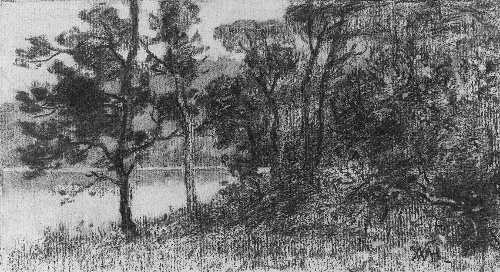

In [ ]:
image14422

In [ ]:
## Proceed by applying a function that forms the image path, based on the field Object_ID

In [ ]:
df2['imgPath'] = df2.apply(lambda row: DatasetPath + str(row.Object_ID)+'/0.jpg' , axis=1)

In [ ]:
df2.sample(n=5)

,Object_ID,label,imgPath
147323,248151,Bronzes,Dataset/248151/0.jpg
315997,466706,Textiles-Woven-Brocade,Dataset/466706/0.jpg
219794,351244,Books|Ornament & Architecture,Dataset/351244/0.jpg
239401,371713,Prints,Dataset/371713/0.jpg
179958,287780,Photographs,Dataset/287780/0.jpg


In [ ]:
img_1 = df2[ df2['Object_ID']==261722]['imgPath'].tolist()

In [ ]:
len(img_1)

1

In [ ]:
print(img_1)

['Dataset/261722/0.jpg']


In [ ]:
img_1_file = img_1[0]

In [ ]:
print(img_1_file)

Dataset/261722/0.jpg


In [ ]:
# Testing whether the above image file exists:
isExist_1 = os.path.exists(img_1_file)
print(isExist_1)

False


In [ ]:
# Clearing out all records with no associated images:

In [ ]:
records_with_images_vector = df2["imgPath"].apply(os.path.exists)


In [ ]:
# Counting how many records with images:

In [ ]:
records_with_images_vector.value_counts()


False    381266
True      18332
Name: imgPath, dtype: int64

In [ ]:
# We want to keep just those with images:

In [ ]:
img_df = df2[records_with_images_vector]

In [ ]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18332 entries, 17275 to 473696
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Object_ID  18332 non-null  int64 
 1   label      18332 non-null  object
 2   imgPath    18332 non-null  object
dtypes: int64(1), object(2)
memory usage: 572.9+ KB


In [ ]:
# Testing the availability of a sample of images:

In [ ]:
random_img = img_df.sample()

In [ ]:
print(random_img)

       Object_ID                         label              imgPath
22676      27643  Equestrian Equipment-Saddles  Dataset/27643/0.jpg


In [ ]:
imgFile = random_img.iloc[0]['imgPath']

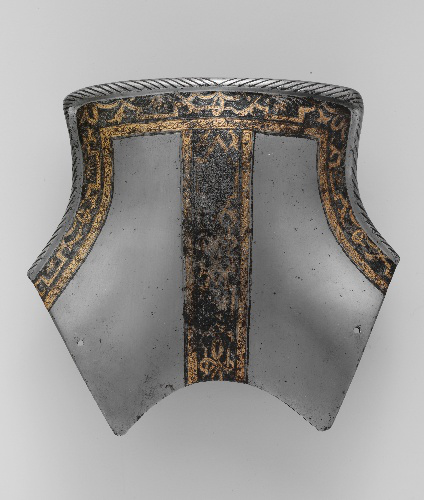

In [ ]:
Image.open(imgFile)

In [ ]:
sample10 = img_df.sample(n=10)

In [ ]:
for k in range(5):
    imgFile = sample10.iloc[k]['imgPath']
    if( os.path.exists(imgFile) ):
        print(f"The image {k} is there!")
        

The image 0 is there!
The image 1 is there!
The image 2 is there!
The image 3 is there!
The image 4 is there!


In [ ]:
# Now let's check the counts of lables with available images:
img_df['label'].value_counts()[:50]

Prints                                  2877
Vases                                   1784
Drawings                                1142
Ceramics                                 793
Textiles-Woven                           654
Photographs|Ephemera                     647
Paintings                                557
Prints|Ephemera                          530
Photographs                              525
Glass                                    431
Ceramics-Porcelain                       312
Sculpture                                305
Textiles-Embroidered                     304
Ceramics-Pottery                         254
Drawings|Ornament & Architecture         246
Metalwork-Silver                         221
Textiles-Laces                           196
Metalwork                                167
Textiles                                 155
Stucco                                   147
Bronzes                                  142
Gold and Silver                          139
Jade      

In [ ]:
abundant_labels = img_df['label'].value_counts().loc[lambda x: x>250]

In [ ]:
abundant_labels.info()

<class 'pandas.core.series.Series'>
Index: 14 entries, Prints to Ceramics-Pottery
Series name: label
Non-Null Count  Dtype
--------------  -----
14 non-null     int64
dtypes: int64(1)
memory usage: 224.0+ bytes


In [ ]:
print(abundant_labels)

Prints                  2877
Vases                   1784
Drawings                1142
Ceramics                 793
Textiles-Woven           654
Photographs|Ephemera     647
Paintings                557
Prints|Ephemera          530
Photographs              525
Glass                    431
Ceramics-Porcelain       312
Sculpture                305
Textiles-Embroidered     304
Ceramics-Pottery         254
Name: label, dtype: int64


In [ ]:
Selected_Labels = ['Prints', 'Vases', 'Textiles-Woven', 'Sculpture']

In [ ]:
# Define the size of the sub_Dataframe for each label:
sub_df_size = 125

In [ ]:
img_df_sel_labels = img_df.loc[ img_df['label'].isin(Selected_Labels) ]

In [ ]:
img_df_sel_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5620 entries, 22436 to 473611
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Object_ID  5620 non-null   int64 
 1   label      5620 non-null   object
 2   imgPath    5620 non-null   object
dtypes: int64(1), object(2)
memory usage: 175.6+ KB


In [ ]:
img_df_sel_labels.groupby(['label'])['label'].count()

label
Prints            2877
Sculpture          305
Textiles-Woven     654
Vases             1784
Name: label, dtype: int64

In [ ]:
# The above dataframe is not balanced.
# We need to take 125 of each

In [ ]:
cols = img_df.columns
cols = cols.tolist()

In [ ]:
print(cols)

['Object_ID', 'label', 'imgPath']


In [ ]:
# img_df_filtered = pd.DataFrame(columns=cols)

In [ ]:
# print(img_df_filtered)

Empty DataFrame
Columns: [Object_ID, label, imgPath]
Index: []


In [ ]:
sub_dfs={}

for lbl in Selected_Labels:
    print(lbl)
    sub_dfs[lbl] = img_df.loc[ img_df['label']==lbl ][:125]


Prints
Vases
Textiles-Woven
Sculpture


In [ ]:
sub_dfs['Sculpture']

,Object_ID,label,imgPath
22436,27388,Sculpture,Dataset/27388/0.jpg
30422,36085,Sculpture,Dataset/36085/0.jpg
31738,37414,Sculpture,Dataset/37414/0.jpg
31943,37620,Sculpture,Dataset/37620/0.jpg
32380,38079,Sculpture,Dataset/38079/0.jpg
...,...,...,...
38458,44615,Sculpture,Dataset/44615/0.jpg
38642,44799,Sculpture,Dataset/44799/0.jpg
38681,44838,Sculpture,Dataset/44838/0.jpg
38685,44842,Sculpture,Dataset/44842/0.jpg


In [ ]:
lbl_dfs_list = []
for lbl in Selected_Labels:
    lbl_dfs_list.append(sub_dfs[lbl])


In [ ]:
lbl_dfs_list

[       Object_ID   label              imgPath
 30805      36471  Prints  Dataset/36471/0.jpg
 30807      36473  Prints  Dataset/36473/0.jpg
 30817      36483  Prints  Dataset/36483/0.jpg
 30819      36485  Prints  Dataset/36485/0.jpg
 30837      36503  Prints  Dataset/36503/0.jpg
 ...          ...     ...                  ...
 46556      54148  Prints  Dataset/54148/0.jpg
 46557      54149  Prints  Dataset/54149/0.jpg
 46567      54159  Prints  Dataset/54159/0.jpg
 46569      54161  Prints  Dataset/54161/0.jpg
 46594      54189  Prints  Dataset/54189/0.jpg
 
 [125 rows x 3 columns],
         Object_ID  label               imgPath
 139311     239957  Vases  Dataset/239957/0.jpg
 139323     239969  Vases  Dataset/239969/0.jpg
 139326     239972  Vases  Dataset/239972/0.jpg
 139332     239978  Vases  Dataset/239978/0.jpg
 139365     240012  Vases  Dataset/240012/0.jpg
 ...           ...    ...                   ...
 147003     247811  Vases  Dataset/247811/0.jpg
 147004     247812  Vases

In [ ]:
img_df_filtered = pd.concat(lbl_dfs_list)

In [ ]:
img_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 30805 to 38731
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Object_ID  500 non-null    int64 
 1   label      500 non-null    object
 2   imgPath    500 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.6+ KB


In [ ]:
img_df_filtered.sample()

,Object_ID,label,imgPath
146882,247687,Vases,Dataset/247687/0.jpg


In [ ]:
img_df_filtered.groupby(['label'])['label'].count()

label
Prints            125
Sculpture         125
Textiles-Woven    125
Vases             125
Name: label, dtype: int64

In [ ]:
img_df_filtered

,Object_ID,label,imgPath
30805,36471,Prints,Dataset/36471/0.jpg
30807,36473,Prints,Dataset/36473/0.jpg
30817,36483,Prints,Dataset/36483/0.jpg
30819,36485,Prints,Dataset/36485/0.jpg
30837,36503,Prints,Dataset/36503/0.jpg
...,...,...,...
38458,44615,Sculpture,Dataset/44615/0.jpg
38642,44799,Sculpture,Dataset/44799/0.jpg
38681,44838,Sculpture,Dataset/44838/0.jpg
38685,44842,Sculpture,Dataset/44842/0.jpg


In [ ]:
# **** Taking a copy of just the selected images out of the dataset and placing them in a separate folder, 
# to be used for our model

In [ ]:
import glob
import shutil
import os

In [ ]:
src_dir = "Dataset/"
dst_dir = "dataset_filtered/"

In [ ]:
#paths = df_filtered.imgPath.values
IDs = img_df_filtered.Object_ID.values

In [ ]:
imgPath2 = []
for k in IDs:
    jpgFile = "Dataset/" + str(k)+'/0.jpg'    
    dest_jpgFile = "dataset_filtered/" + str(k)
    shutil.copy(jpgFile, dest_jpgFile)
    os.rename(dest_jpgFile, dest_jpgFile+'.jpg')
    imgPath2.append(dest_jpgFile + '.jpg') 

In [ ]:
imgPath2

['dataset_filtered/36471.jpg',
 'dataset_filtered/36473.jpg',
 'dataset_filtered/36483.jpg',
 'dataset_filtered/36485.jpg',
 'dataset_filtered/36503.jpg',
 'dataset_filtered/36505.jpg',
 'dataset_filtered/36510.jpg',
 'dataset_filtered/36525.jpg',
 'dataset_filtered/36528.jpg',
 'dataset_filtered/36529.jpg',
 'dataset_filtered/36531.jpg',
 'dataset_filtered/36536.jpg',
 'dataset_filtered/36540.jpg',
 'dataset_filtered/36542.jpg',
 'dataset_filtered/36587.jpg',
 'dataset_filtered/36592.jpg',
 'dataset_filtered/36603.jpg',
 'dataset_filtered/36607.jpg',
 'dataset_filtered/36608.jpg',
 'dataset_filtered/36659.jpg',
 'dataset_filtered/36706.jpg',
 'dataset_filtered/36707.jpg',
 'dataset_filtered/36711.jpg',
 'dataset_filtered/36716.jpg',
 'dataset_filtered/36720.jpg',
 'dataset_filtered/36726.jpg',
 'dataset_filtered/36727.jpg',
 'dataset_filtered/36769.jpg',
 'dataset_filtered/36789.jpg',
 'dataset_filtered/36834.jpg',
 'dataset_filtered/36852.jpg',
 'dataset_filtered/36871.jpg',
 'datase

In [ ]:
img_df_filtered['imgPath'] = imgPath2

In [ ]:
img_df_filtered

,Object_ID,label,imgPath
30805,36471,Prints,dataset_filtered/36471.jpg
30807,36473,Prints,dataset_filtered/36473.jpg
30817,36483,Prints,dataset_filtered/36483.jpg
30819,36485,Prints,dataset_filtered/36485.jpg
30837,36503,Prints,dataset_filtered/36503.jpg
...,...,...,...
38458,44615,Sculpture,dataset_filtered/44615.jpg
38642,44799,Sculpture,dataset_filtered/44799.jpg
38681,44838,Sculpture,dataset_filtered/44838.jpg
38685,44842,Sculpture,dataset_filtered/44842.jpg


In [ ]:
img_df_filtered.to_csv('img_df_filtered.csv')